In [1]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)
yA = y
#y = y.drop('yes', axis = 1)

In [3]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [4]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [5]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [6]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


In [7]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [8]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [9]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [10]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [11]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [12]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [13]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample

In [15]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [16]:
#IMBALANCED DATASET FIX
bank_final1 = pd.concat([bank_final, y], axis = 1)
df_majority = bank_final1[bank_final1['yes'] == 0]
df_minority = bank_final1[bank_final1['yes'] == 1]

In [17]:
#IMBALANCED DATASET FIX
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=123) 

In [18]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['yes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('yes', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [22]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.941396


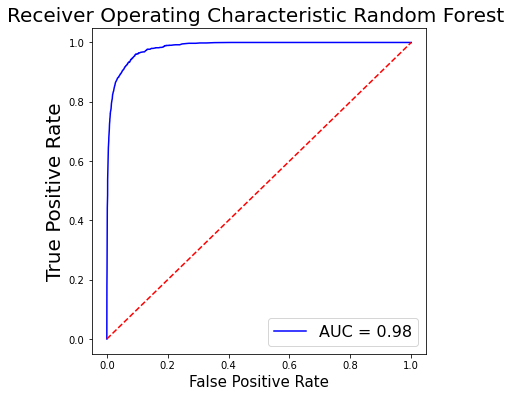

In [23]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [24]:
print('Cross Validation mean: ', (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean()))

Cross Validation mean:  0.9413963828378422


In [25]:
print('Cross Validation values: ', cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy'))

Cross Validation values:  [0.94584349 0.93149201 0.94584349 0.94476036 0.93528297 0.94232331
 0.94339112 0.94582882 0.93580715 0.94339112]


In [26]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

RFC Confusion Matrix
 [[6750  354]
 [ 177 1621]]


In [27]:
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7104
           1       0.82      0.90      0.86      1798

    accuracy                           0.94      8902
   macro avg       0.90      0.93      0.91      8902
weighted avg       0.94      0.94      0.94      8902



In [40]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))
var = confusion_matrix(y_test,rfcpred)

RFC Confusion Matrix
 [[6750  354]
 [ 177 1621]]
6750


In [46]:
r0 = round(var[0][0] /(var[0][0] + var[1][0]),2)
print('Specificity/ Recall 0 : ', r0)

Specificity/ Recall 0 :  0.97


In [45]:
r1 = round(var[1][1]/(var[1][1]+var[0][1]),2)
print('Sensitivity/ Recall 1 : ',r1)

Sensitivity/ Recall 1 :  0.82


In [48]:
p0 = round(var[0][0] /(var[0][0] + var[0][1]),2)
print('Precision 0 : ',p0)

Precision 0 :  0.95


In [47]:
p1 = round(var[1][1] /(var[1][1] + var[1][0]),2)
print('Precision 1 : ',p1)

Precision 1 :  0.9


In [55]:
f0 = 2*((r0*p0)/(r0+p0))
print('F1-Score 0: ', f0)

F1-Score 0:  0.9598958333333334


In [57]:
f1 = 2*((r1*p1)/(r1+p1))
print('F1-Score 1: ', f1)

F1-Score 1:  0.858139534883721


In [51]:
AVG_precision =  (p0+p1)/2
print('AVT/Total Precision', round(AVG_precision,2))

AVT/Total Precision 0.92


In [52]:
AVG_Recall =  (r0+r1)/2
print('AVT/Total Recall', round(AVG_Recall,2))

AVT/Total Recall 0.9


In [58]:
AVG_f1 =  (f0+f1)/2
print('AVT/Total F1-Score', round(AVG_f1,2))

AVT/Total F1-Score 0.91
